<a href="https://colab.research.google.com/github/BrilliantChard/100-days-of-tensorflow/blob/main/Image_Classification_Simplilearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Happy Coding!")

Happy Coding!


In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1, )

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

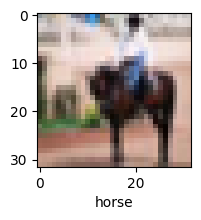

In [15]:
plot_sample(x_train, y_train, 11)

# Normalizing

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test.shape

(10000, 32, 32, 3)

# Creating Artifcial Neural Network (ANN)

In [19]:
x_train.shape

(50000, 32, 32, 3)

Adding Layers

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the Model

In [21]:
ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Fitting / Running the model

In [22]:
ann.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.1780 - loss: 2.2172
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3300 - loss: 1.8759
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.3655 - loss: 1.7787
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4042 - loss: 1.6873
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4118 - loss: 1.6511
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4271 - loss: 1.6130
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4322 - loss: 1.5960
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4404 - loss: 1.5740
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.4537 - loss: 1.5385
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.4596 - loss: 1.5139


In [23]:
from sklearn.metrics import classification_report

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(f"Classification report: \n{classification_report(y_test, y_pred_classes)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification report: 
              precision    recall  f1-score   support

           0       0.53      0.44      0.48      1000
           1       0.59      0.60      0.59      1000
           2       0.28      0.38      0.32      1000
           3       0.33      0.20      0.25      1000
           4       0.39      0.40      0.39      1000
           5       0.37      0.38      0.37      1000
           6       0.45      0.56      0.50      1000
           7       0.57      0.41      0.47      1000
           8       0.48      0.70      0.57      1000
           9       0.61      0.41      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



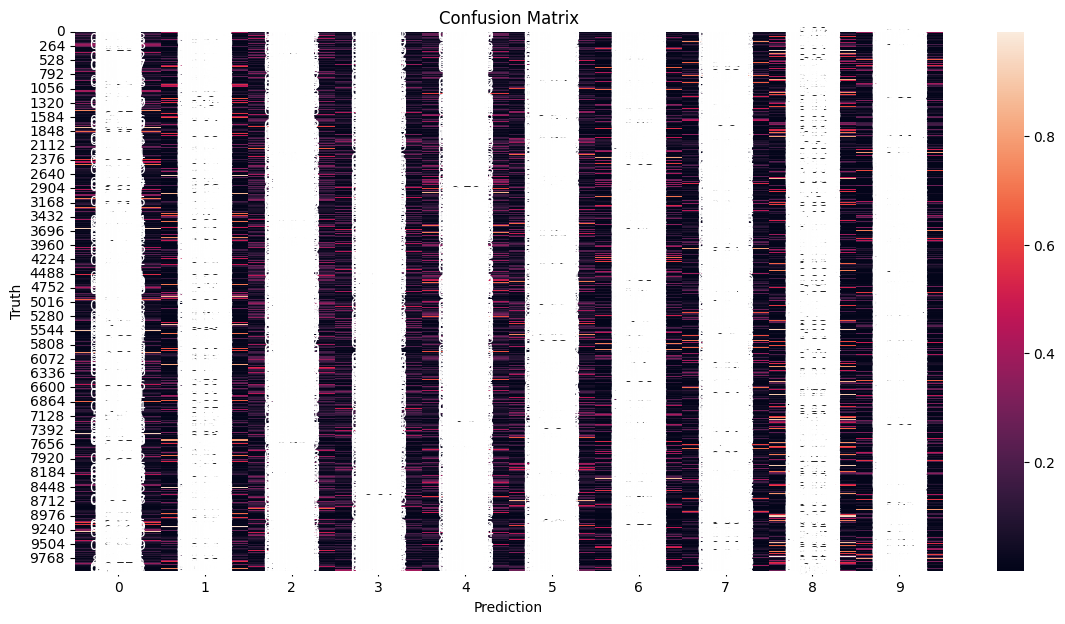

In [24]:
plt.figure(figsize=(14, 7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

# Creating Convolution Neural Networks (CNN)

In [25]:
x_train.shape

(50000, 32, 32, 3)

Model Selection - Using CNN

In [26]:
cnn = models.Sequential([

                         # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

                        # Deep Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compilation

      1. Optimizer = Adam
      2. Loss = Sparse CategoricalCross entropy
      3. Metrics = Accuracy

In [27]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Fitting / Running the Model

In [ ]:
cnn.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
  7/100 ━━━━━━━━━━━━━━━━━━━━ 1:04 690ms/step - accuracy: 0.7051 - loss: 0.8400

In [29]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6650 - loss: 0.9689


[0.9822803735733032, 0.6608999967575073]

In [30]:
y_pred_cnn = cnn.predict(x_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [31]:
from sklearn.metrics import classification_report

print(f"Classification report: \n{classification_report(y_test, y_pred_classes_cnn)}")

Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1000
           1       0.82      0.73      0.77      1000
           2       0.48      0.61      0.54      1000
           3       0.58      0.33      0.42      1000
           4       0.61      0.61      0.61      1000
           5       0.57      0.54      0.56      1000
           6       0.68      0.81      0.74      1000
           7       0.72      0.73      0.72      1000
           8       0.78      0.78      0.78      1000
           9       0.72      0.76      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [32]:
y_pred_classes_cnn[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

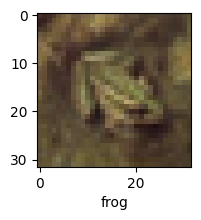

In [34]:
plot_sample(x_test, y_test, 756)

In [35]:
classes[y_pred_classes_cnn[756]]

'frog'